# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a [Meetup](https://www.meetup.com/) dataset for events occurring in Nashville.

## Objectives

You will be able to: 

- Make visualizations of clusters and gain insights about how the clusters have formed 
- Cluster a real-life social network dataset to detect communities within the network  


## Load the Dataset

To get started, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
# Your code here
import pandas as pd
groups = pd.read_csv('nashville-meetup/group-edges.csv', index_col=0)
groups.head()

,group1,group2,weight
0,19292162,535553,2
1,19292162,19194894,1
2,19292162,19728145,1
3,19292162,18850080,2
4,19292162,1728035,1


To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [2]:
# Your code here
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')
groups_meta.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname
0,339011,Nashville Hiking Meetup,15838,23,Outdoors & Adventure,4353803,nashville-hiking
1,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance
2,6335372,Nashville soccer,2869,32,Sports & Recreation,108448302,Nashville-soccer
3,10016242,NashJS,1975,34,Tech,8111102,nashjs
4,21174496,20's & 30's Women looking for girlfriends,2782,31,Socializing,184580248,new-friends-in-Nashville


## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [3]:
# Your code here
import networkx as nx

group_dict = dict(zip(groups_meta.group_id, groups_meta.group_name))
G = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    G.add_edge(g1, g2, weight=weight)

## Visualize the Network

C:\Users\Ryans\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


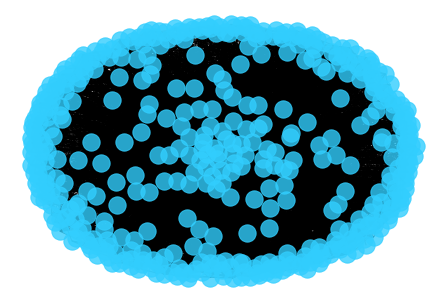

In [4]:
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G, pos=nx.spring_layout(G, k=2, seed=5), alpha=.8, node_color='#32cefe')

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [5]:
# Your code here
for i in range(0,100,5):
    print('{}th percentile: {}'.format(i,groups.weight.quantile(q=i/100)))

0th percentile: 1.0
5th percentile: 1.0
10th percentile: 1.0
15th percentile: 1.0
20th percentile: 1.0
25th percentile: 1.0
30th percentile: 1.0
35th percentile: 1.0
40th percentile: 1.0
45th percentile: 1.0
50th percentile: 1.0
55th percentile: 1.0
60th percentile: 1.0
65th percentile: 1.0
70th percentile: 2.0
75th percentile: 2.0
80th percentile: 2.0
85th percentile: 3.0
90th percentile: 4.0
95th percentile: 7.0


## Cluster the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

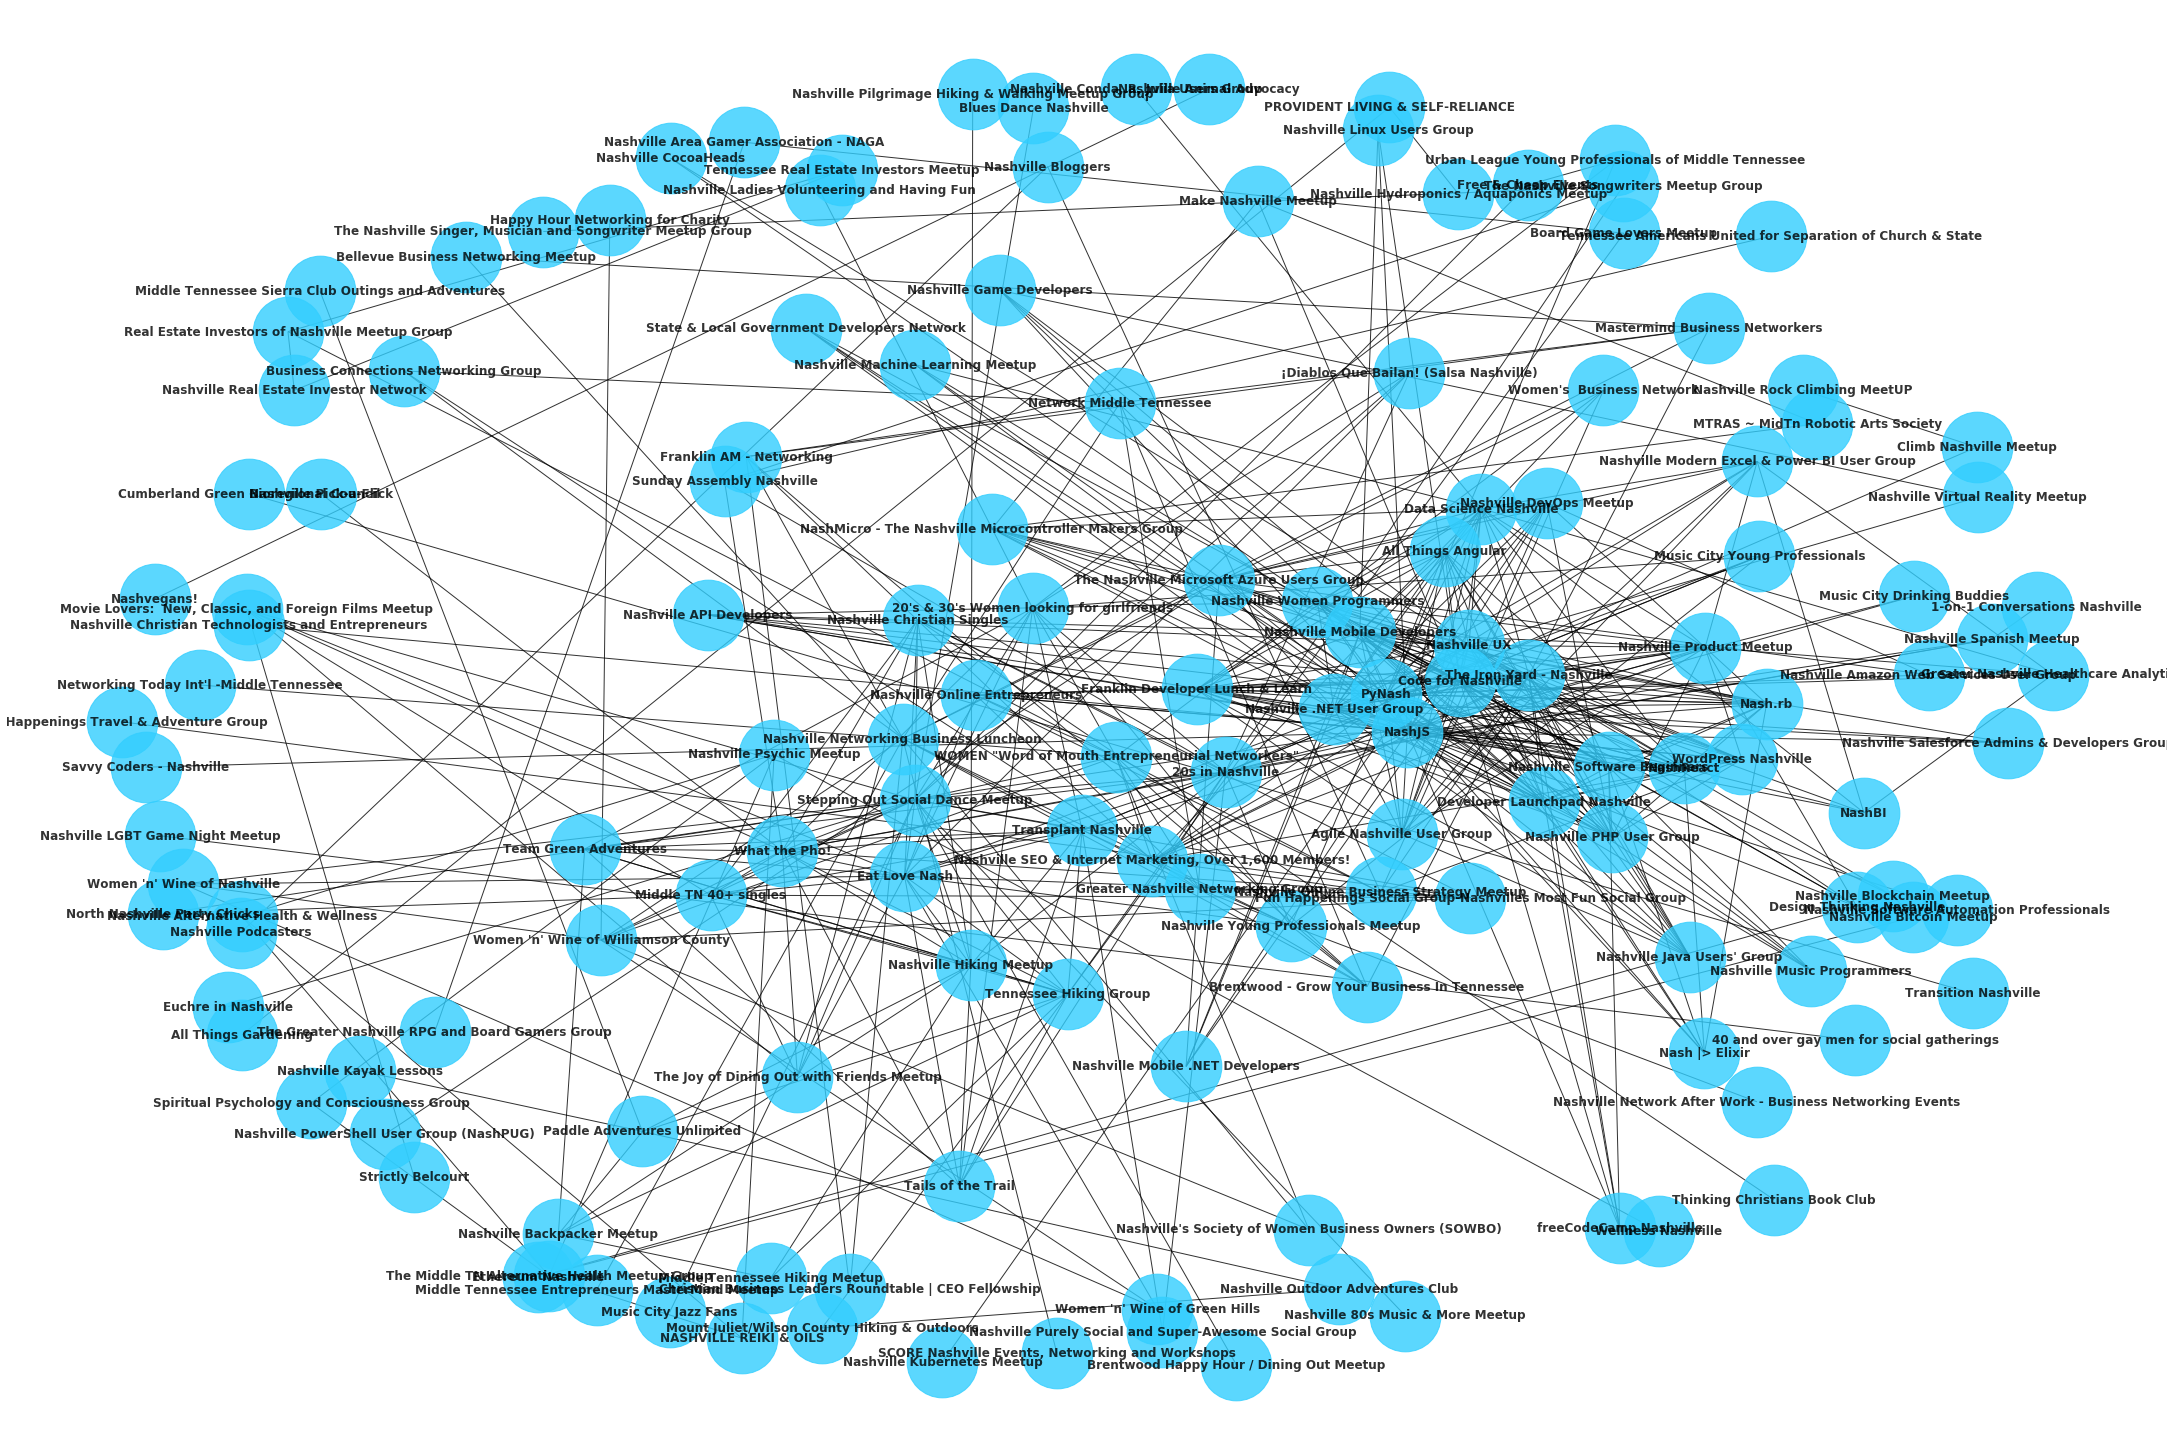

In [6]:
# Your code here
threshold = 5
G_subset = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    if weight > threshold:
        G_subset.add_edge(g1, g2, weight=weight)
plt.figure(figsize=(30,20))
nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=5),
        alpha=.8, node_color='#32cefe', node_size=5000,
        with_labels=True, font_size=12, font_weight='bold')

In [7]:
len(G_subset)

146

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

In [8]:
# Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_subset))
for n, clusters in enumerate(gn_clusters):
    print('After removing {} edges, there are {} clusters.'.format(n, len(clusters)))

After removing 0 edges, there are 7 clusters.
After removing 1 edges, there are 8 clusters.
After removing 2 edges, there are 9 clusters.
After removing 3 edges, there are 10 clusters.
After removing 4 edges, there are 11 clusters.
After removing 5 edges, there are 12 clusters.
After removing 6 edges, there are 13 clusters.
After removing 7 edges, there are 14 clusters.
After removing 8 edges, there are 15 clusters.
After removing 9 edges, there are 16 clusters.
After removing 10 edges, there are 17 clusters.
After removing 11 edges, there are 18 clusters.
After removing 12 edges, there are 19 clusters.
After removing 13 edges, there are 20 clusters.
After removing 14 edges, there are 21 clusters.
After removing 15 edges, there are 22 clusters.
After removing 16 edges, there are 23 clusters.
After removing 17 edges, there are 24 clusters.
After removing 18 edges, there are 25 clusters.
After removing 19 edges, there are 26 clusters.
After removing 20 edges, there are 27 clusters.
After

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

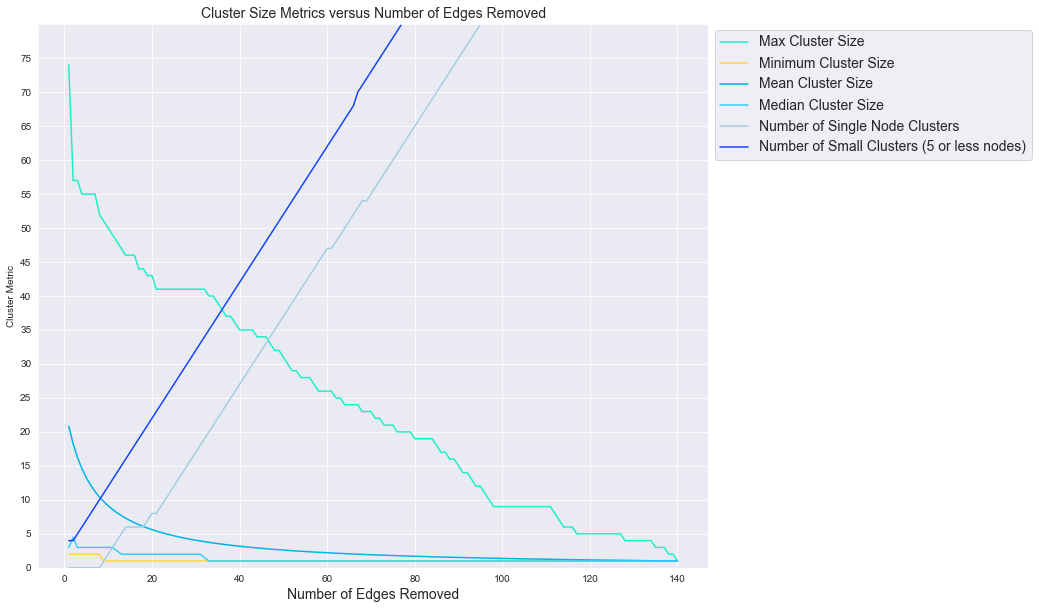

In [9]:
# Your code here
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
          '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
          '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
          '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
          '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
          '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
          '#80cdc1', '#35978f', '#01665e', '#003c30']

fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               